# Global Sharks Analysis

## Load and explore the data

In [585]:
import pandas as pd
import numpy as np
import seaborn as sns
import pylab as plt
%matplotlib inline
pd.set_option("display.max_columns", None)

In [586]:
dataframe = pd.read_csv('../data/attacks.csv', encoding='ISO-8859-1') #Encoding to b
df=dataframe.copy()

To read correctly the CSV, it is necessary to specify the encoding latin1 (ISO-8859-1)

In [587]:
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


*Change col names to access better to the data*

In [588]:
df.columns=[c.lower().replace(' ', '_') for c in df.columns]
df.columns=[c.lower().replace('.', '_') for c in df.columns]
df.columns=[c.lower().replace(':', '') for c in df.columns]
df.columns=[c.lower().replace('/', 'O') for c in df.columns]
df.columns=[c.lower().replace('(', '') for c in df.columns]
df.columns=[c.lower().replace(')', '') for c in df.columns]

In [589]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_number             8702 non-null   object 
 1   date                    6302 non-null   object 
 2   year                    6300 non-null   float64
 3   type                    6298 non-null   object 
 4   country                 6252 non-null   object 
 5   area                    5847 non-null   object 
 6   location                5762 non-null   object 
 7   activity                5758 non-null   object 
 8   name                    6092 non-null   object 
 9   sex_                    5737 non-null   object 
 10  age                     3471 non-null   object 
 11  injury                  6274 non-null   object 
 12  fatal_yon               5763 non-null   object 
 13  time                    2948 non-null   object 
 14  species_                3464 non-null 

In [590]:
df.rename(columns = {'sex_':'sex', 'species_':'species'}, inplace = True)

In [591]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_number             8702 non-null   object 
 1   date                    6302 non-null   object 
 2   year                    6300 non-null   float64
 3   type                    6298 non-null   object 
 4   country                 6252 non-null   object 
 5   area                    5847 non-null   object 
 6   location                5762 non-null   object 
 7   activity                5758 non-null   object 
 8   name                    6092 non-null   object 
 9   sex                     5737 non-null   object 
 10  age                     3471 non-null   object 
 11  injury                  6274 non-null   object 
 12  fatal_yon               5763 non-null   object 
 13  time                    2948 non-null   object 
 14  species                 3464 non-null 

All the columns except 'year and original order' have object dtype. This should be corrected.

In [592]:
df.shape #The datafram has 24 columns and 25723 rows

(25723, 24)

### REVIEW 1. Correct the data types

#### 1.1 Categorical types 

In [593]:
cat_df=df.select_dtypes(include='object')

cat_df.columns

Index(['case_number', 'date', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex', 'age', 'injury', 'fatal_yon', 'time',
       'species', 'investigator_or_source', 'pdf', 'href_formula', 'href',
       'case_number_1', 'case_number_2', 'unnamed_22', 'unnamed_23'],
      dtype='object')

In [594]:
df.head()

,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_yon,time,species,investigator_or_source,pdf,href_formula,href,case_number_1,case_number_2,original_order,unnamed_22,unnamed_23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


The columns `unnamed_22` & `unnamed_23` seem to have irrelevant information as its header is "unnamed".
Let's check which values are and how we can correct them

In [595]:
df.unnamed_23.unique()

array([nan, 'Teramo', 'change filename'], dtype=object)

In [596]:
df.unnamed_22.unique()

array([nan, 'stopped here'], dtype=object)

The restrictions for the project are that none of the columns should be erased. So we are going to replace these values by 'unknown'

In [597]:
df['unnamed_22'] = 'unknown'
df['unnamed_23'] = 'unknown'

In [598]:
print(df.unnamed_22.unique(), df.unnamed_23.unique())

['unknown'] ['unknown']


**********************************

### 2. Null values

Now, let's check the null values of the dataset and how we can explore them.

In [599]:
nan_cols=df.isna().sum()

nan_cols[nan_cols>0]

case_number               17021
date                      19421
year                      19423
type                      19425
country                   19471
area                      19876
location                  19961
activity                  19965
name                      19631
sex                       19986
age                       22252
injury                    19449
fatal_yon                 19960
time                      22775
species                   22259
investigator_or_source    19438
pdf                       19421
href_formula              19422
href                      19421
case_number_1             19421
case_number_2             19421
original_order            19414
dtype: int64

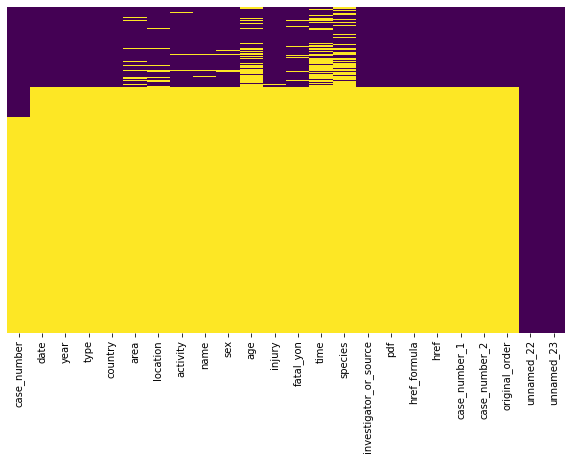

In [600]:
plt.figure(figsize=(10, 6))

sns.heatmap(df.isna(),
            yticklabels=False,
            cmap='viridis',
            cbar=False)

plt.show()

All the yellow values of the heatmap are null values. We have to decide what to do in each column in order to clean up the data for the analysis. The yellow are is big so I'm going to erase the rows that have more than 18 null columns 

In [601]:
quantity_of_nulls = 18
df.iloc[df[(df.isnull().sum(axis=1)>quantity_of_nulls)].index]
df = df.drop(df[df.isnull().sum(axis=1) > 18].index)

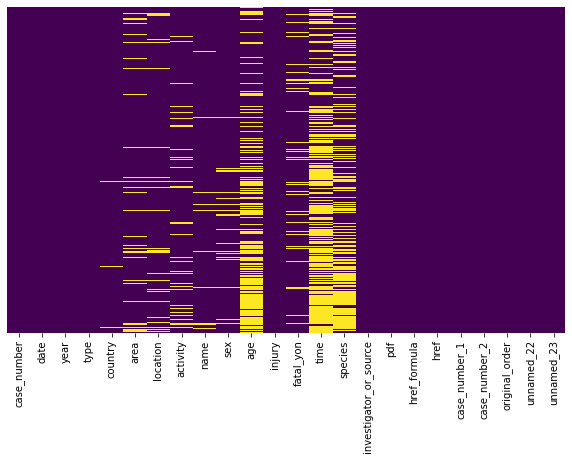

In [602]:
plt.figure(figsize=(10, 6))

sns.heatmap(df.isna(),
            yticklabels=False,
            cmap='viridis',
            cbar=False)

plt.show()

In [603]:
df.shape

(6302, 24)

Now, the dataset has a **24,5%** of the original data. In other words, the rows with more than **18 of 24** null values are the **76,5%** of the original data.

In [604]:
nan_cols=df.isna().sum()
nan_cols[nan_cols>0]

case_number                  1
year                         2
type                         4
country                     50
area                       455
location                   540
activity                   544
name                       210
sex                        565
age                       2831
injury                      28
fatal_yon                  539
time                      3354
species                   2838
investigator_or_source      17
href_formula                 1
dtype: int64

For our insights, we need the columns `'year', 'country', 'time', 'species' , 'age'` .So, if the rows in this coolumns are null, we will drop them.

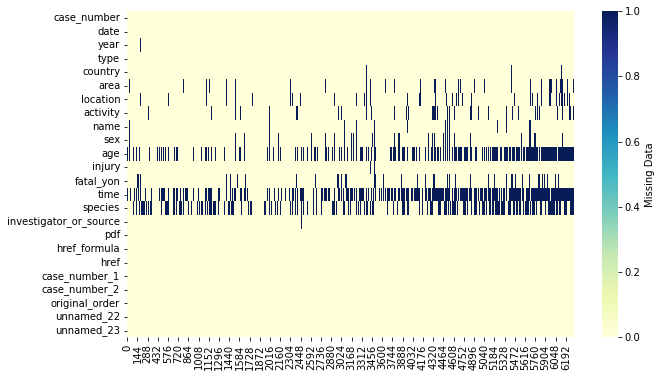

In [605]:
plt.figure(figsize=(10, 6))

sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

plt.show()

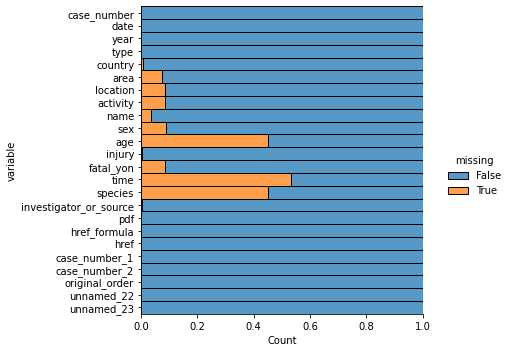

In [606]:
sns.displot(data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25)

plt.show()

As we can see, the columns age, time and species are the ones with higher missing values. Let's erase the values that converge in them.

##### Age - Time - Species
The null values that converge in the three columns

In [607]:
indices_to_drop = list()
for index, row in df.iterrows():
        if (pd.isnull(row["age"]) or pd.isna(row["age"]) or row["age"] == " ") and \
                (pd.isnull(row["time"]) or pd.isna(row["time"]) or row[
                    "time"] == " ") and \
                (pd.isnull(row["species"]) or pd.isna(row["species"]) or row["species"] == ""): 
            indices_to_drop.append(index)
df.drop(labels=indices_to_drop, inplace=True)

##### Age - Time
The null values that converge in both columns 

In [608]:
indices_to_drop = list()
for index, row in df.iterrows():
        if (pd.isnull(row["age"]) or pd.isna(row["age"]) or row["age"] == " ") and \
                (pd.isnull(row["time"]) or pd.isna(row["time"]) or row[
                    "time"] == " "): 
            indices_to_drop.append(index)
df.drop(labels=indices_to_drop, inplace=True)

##### Age - Species
The null values that converge in both columns 

In [609]:
indices_to_drop = list()
for index, row in df.iterrows():
        if (pd.isnull(row["age"]) or pd.isna(row["age"]) or row["age"] == " ") and \
                (pd.isnull(row["species"]) or pd.isna(row["species"]) or row[
                    "species"] == " "): 
            indices_to_drop.append(index)
df.drop(labels=indices_to_drop, inplace=True)

##### Time - Species
The null values that converge in both columns 

In [610]:
indices_to_drop = list()
for index, row in df.iterrows():
        if (pd.isnull(row["time"]) or pd.isna(row["time"]) or row["time"] == " ") and \
                (pd.isnull(row["species"]) or pd.isna(row["species"]) or row[
                    "species"] == " "): 
            indices_to_drop.append(index)
df.drop(labels=indices_to_drop, inplace=True)

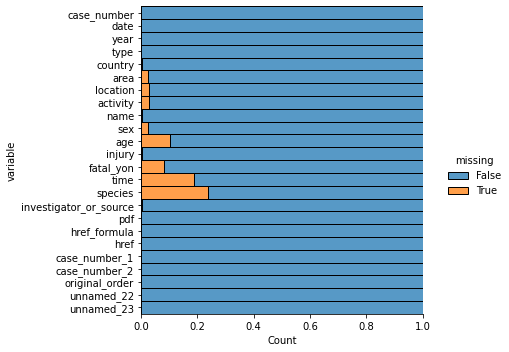

In [611]:
sns.displot(data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25)

plt.show()

In [612]:
df.shape

(3311, 24)

In [613]:
nan_cols=df.isna().sum()
nan_cols[nan_cols>0]

year                        1
country                     7
area                       80
location                   90
activity                   96
name                       15
sex                        84
age                       336
injury                      5
fatal_yon                 269
time                      619
species                   783
investigator_or_source      4
dtype: int64

##### Column `species`

In [614]:
df['species'].isnull().sum()

783

In [615]:
df.species.nunique()

1218

There are 1218 unique values in the column. There are too many, so first we are going to get rid of the null values.

In [616]:
df[df['species'].isna()]

,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_yon,time,species,investigator_or_source,pdf,href_formula,href,case_number_1,case_number_2,original_order,unnamed_22,unnamed_23
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,unknown,unknown
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,unknown,unknown
9,2018.05.26.a,26-May-2018,2018.0,Unprovoked,USA,Florida,"Daytona Beach, Volusia County",Standing,male,M,12,Minor injury to foot,N,14h00,NaN,"K. McMurray, Tracking Sharks.com",2018.05.26.a-DaytonaBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.a,2018.05.26.a,6294.0,unknown,unknown
12,2018.05.13.b,13-May-2018,2018.0,Unprovoked,USA,South Carolina,"Hilton Head Island, Beaufort County",Swimming,Jei Turrell,M,10,Severe bite to right forearm,N,15h00,NaN,"C. Creswell, GSAF & K. McMurray TrackingSharks...",2018.05.13.b-Turrell.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.13.b,2018.05.13.b,6291.0,unknown,unknown
29,2018.04.15.a,15-Apr-2018,2018.0,Unprovoked,AUSTRALIA,Western Australia,"Cobblestones, Margaret River Area",Surfing,Alejandro Travaglini,M,37,Lacerations to legs,N,08h00,NaN,"B.Myatt, GSAF",2018.04.15.a-Travaglini.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.15.a,2018.04.15.a,6274.0,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5991,1858.03.14,14-Mar-1858,1858.0,Unprovoked,AUSTRALIA,Victoria,Hobson Bay,Bathing,Adolphe Bollander,M,22,FATAL,Y,15h00,NaN,"Moreton Bay Courier, 3/31/1858",1858.03.14-Bollander.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1858.03.14,1858.03.14,312.0,unknown,unknown
6077,1837.01.17,17-Jan-1837,1837.0,Unprovoked,AUSTRALIA,New South Wales,Macleay River,Washing his feet,Alfred Australia Howe,M,12,"FATAL Injured by shark, died of tetanus",Y,Evening,NaN,Gazette (Sydney) 1/31/1837; Proc. Royal Aust. ...,1837.01.17-Howe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1837.01.17,1837.01.17,226.0,unknown,unknown
6114,1817.05.11,11-May-1817,1817.0,Unprovoked,SRI LANKA,Western Province,Colombo,Swimming,William May,M,22,FATAL,Y,Evening,NaN,Edinburgh Advertiser. 11/4/1817; R. DeSilva,1817.05.11-May.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1817.05.11,1817.05.11,189.0,unknown,unknown
6160,1703.03.26,26-Mar-1703,1703.0,Unprovoked,BARBADOS,Southwest coast,Carlisle Bay,Swimming,"Samuel Jennings, a deserter from the British f...",M,19,"Hand and foot severely bitten, surgically ampu...",N,Night,NaN,"W.R.Cutter, Vol.1, p.252",1703.03.26-Jennings.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1703.03.26,1703.03.26,143.0,unknown,unknown


In [617]:
index_sp=df[df['species'].isna()].index
df.drop(index=index_sp,inplace=True)

In [618]:
df.shape

(2528, 24)

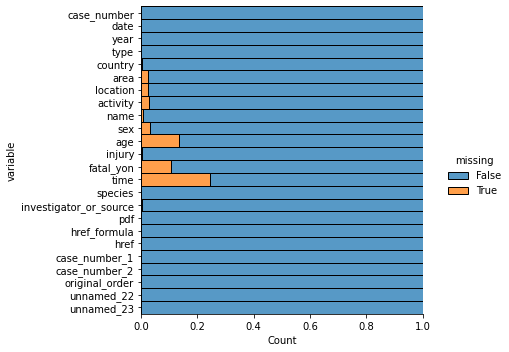

In [619]:
sns.displot(data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25)

plt.show()

##### Column `time`

In [620]:
df['time'].isnull().sum()

619

In [621]:
df.time.unique()

array(['18h00', 'Late afternoon', nan, '17h00', 'Morning', '08h15',
       '10h30', '10h40', '07h00', '09h30', 'Afternoon', '21h50', '09h40',
       '15h00', '17h35', '15h30', '07h30', '19h00, Dusk', '16h00',
       '08h00', '15h01', '13h45', '23h30', '09h00', '14h30', '18h30',
       '12h30', '14h00', '18h45', '06h00', 'Midday', '10h00', '13h30',
       '10h45', '11h20', '07h45', '11h00', '19h30', '08h30', '15h45',
       'Shortly before 12h00', '08h50', '12h00', '02h00', '9h00', '15h15',
       '16h30', '11h30', 'After noon', '22h00', '16h20', '15h25', '17h30',
       'Morning ', '13h20', 'Midnight', '09h30 / 10h00', '10h15', '18h15',
       '13h50', '19h20', '10h25', '10h45-11h15', '16h45', '15h52',
       '06h15', '14h40', '19h45', '19h00', '10h10', '08h45', '12h10',
       '18h05', '12h25', '17h51', '16h12', '12h45', '10h50', '14h15',
       '13h00', '09h45', '11h45', '06h45', '05h00', '03h30', 'Night',
       '11h15', '06h30', '20h00', '16h40', '16h18', '11h10', '17h50',
       '

There are many values that:
1. they don't say what exact hour is (evening, daybreak, etc)
2. range of hours
3. Sentences out of context



In [622]:
index_time=df[df['time'].isna()].index
df.drop(index=index_time,inplace=True)

In [623]:
df.shape

(1909, 24)

In [624]:
nan_cols=df.isna().sum()
nan_cols[nan_cols>0]

country                     5
area                       32
location                   30
activity                   32
name                       12
sex                        72
age                       336
injury                      3
fatal_yon                 143
investigator_or_source      2
dtype: int64

In [625]:
index_time=df[df['age'].isna()].index
df.drop(index=index_time,inplace=True)

In [626]:
df.shape

(1573, 24)

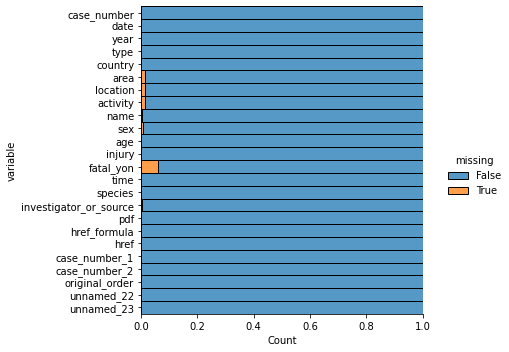

In [627]:
sns.displot(data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25)

plt.show()

##### Column `species`

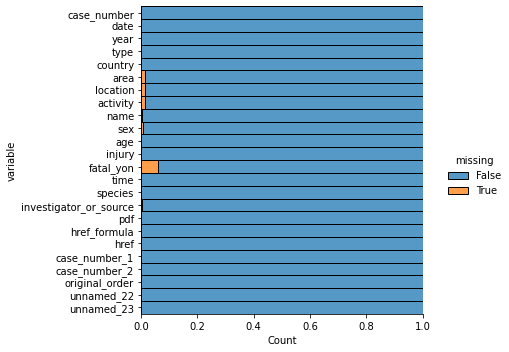

In [628]:
sns.displot(data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25)

plt.show()

In [629]:
df.loc[df['species'].str.contains('white', case=False), 'species'] = 'White shark'

In [630]:
df.loc[df['species'].str.contains('bull', case=False), 'species'] = 'Bull shark'

In [631]:
df.loc[df['species'].str.contains('tiger', case=False), 'species'] = 'Tiger shark'

In [632]:
df.loc[df['species'].str.contains('Shark involvement ', case=False), 'species'] = 'Unknown'
df.loc[df['species'].str.contains('debris', case=False), 'species'] = 'Unknown'
df.loc[df['species'].str.contains('unidentified', case=False), 'species'] = 'Unknown'
df.loc[df['species'].str.contains('no shark', case=False), 'species'] = 'Unknown'

In [633]:
df.loc[df['species'].str.contains('blacktip or spinner shark', case=False), 'species'] = 'Blacktip reef shark'
df.loc[df['species'].str.contains('blacktip ', case=False), 'species'] = 'Blacktip reef shark'

In [634]:
df.loc[df['species'].str.contains('Wobbegong', case=False), 'species'] = 'Wobbegong shark'

In [635]:
df.loc[df['species'].str.contains('Blue ', case=False), 'species'] = 'Blue shark'

In [636]:
df.loc[df['species'].str.contains('Caribbean', case=False), 'species'] = 'Caribbean reef shark'

In [637]:
df.loc[df['species'].str.contains('dogfish', case=False), 'species'] = 'Dogfish shark'

In [638]:
df.loc[df['species'].str.contains('tawny', case=False), 'species'] = 'Tawny nurse shark'

In [639]:
df.loc[df['species'].str.contains('mako', case=False), 'species'] = 'Mako shark'

In [640]:
df.loc[df['species'].str.contains('grey reef shark', case=False), 'species'] = 'Grey reef shark'

In [641]:
df.loc[df['species'].str.contains('bronze', case=False), 'species'] = 'Bronze whaler shark'

In [642]:
df.loc[df['species'].str.contains('galapagos', case=False), 'species'] = 'Galapagos shark'

In [643]:
df.loc[df['species'].str.contains('spin', case=False), 'species'] = 'Spinner shark'

In [644]:
df.loc[df['species'].str.contains('hammer', case=False), 'species'] = 'Hammerhead shark'

In [645]:
df.loc[df['species'].str.contains('Sandtiger', case=False), 'species'] = 'Sandtiger shark'

In [646]:
df.loc[df['species'].str.contains('Ragged', case=False), 'species'] = 'Raggedtooth shark'

In [647]:
df.loc[df['species'].str.contains('grey nurse', case=False), 'species'] = 'Grey nurse shark'
df.loc[df['species'].str.contains('grey colored', case=False), 'species']  = 'Grey nurse shark'
df.loc[df['species'].str.contains('1m', case=False), 'species'] ='Grey reef shark' 

In [648]:
df.loc[df['species'].str.contains('Port', case=False), 'species'] = 'Port Jackson shark'

In [649]:
df.loc[df['species'].str.contains('Zambessi', case=False), 'species'] = 'Zambezi shark'
df.loc[df['species'].str.contains('Zambesi', case=False), 'species'] = 'Zambezi shark'
df.loc[df['species'].str.contains('tooth', case=False), 'species'] = 'Zambezi shark'

In [650]:
df.loc[df['species'].str.contains('whitetip', case=False), 'species'] = 'Ocean whitetip shark'

In [651]:
df.loc[df['species'].str.contains('Porbeagle', case=False), 'species'] = 'Porbeagle shark'

In [652]:
df.loc[df['species'].str.contains('angel', case=False), 'species'] = 'Angel shark'

In [653]:
df.loc[df['species'].str.contains('lemon', case=False), 'species'] = 'Lemon shark'

In [654]:
df.loc[df['species'].str.contains('spur', case=False), 'species'] = 'Spurdog shark'

In [655]:
df.loc[df['species'].str.contains('cookie', case=False), 'species'] = 'Cookie cutter shark'

In [656]:
df.loc[df['species'].str.contains('dusky', case=False), 'species'] = 'Dusky shark'

In [657]:
df.loc[df['species'].str.contains('seven', case=False), 'species'] = 'Sevengill shark'

In [658]:
df.loc[df['species'].str.contains('sand', case=False), 'species'] = 'Sand shark'

In [659]:
df.loc[df['species'].str.contains('copper', case=False), 'species'] = 'Copper shark'

In [660]:
df.loc[df['species'].str.contains('3 m', case=False), 'species'] = 'Unknown'
df.loc[df['species'].str.contains(' m ', case=False), 'species'] = 'Unknown'
df.loc[df['species'].str.contains('small', case=False), 'species'] = 'Unknown'
df.loc[df['species'].str.contains("'", case=False), 'species'] = 'Unknown'
df.loc[df['species'].str.contains('"', case=False), 'species'] = 'Unknown'
df.loc[df['species'].str.contains('kg', case=False), 'species'] ='Unknown'
df.loc[df['species'].str.contains('Invalid', case=False), 'species'] ='Unknown'
df.loc[df['species'].str.contains('Questionable', case=False), 'species'] ='Unknown'
df.loc[df['species'].str.contains('-', case=False), 'species'] ='Unknown'
df.loc[df['species'].str.contains('C. ', case=False), 'species'] ='Unknown'
df.loc[df['species'].str.contains('xa0', case=False), 'species'] ='Unknown'
df.loc[df['species'].str.contains('gill', case=False), 'species'] ='Unknown'
df.loc[df['species'].str.contains(' not ', case=False), 'species'] ='Unknown'
df.loc[df['species'].str.contains('lb', case=False), 'species'] ='Unknown'
df.loc[df['species'].str.contains(',', case=False), 'species'] ='Unknown'
df.loc[df['species'].str.contains('?', case=False, regex=False), 'species'] ='Unknown'
df.loc[df['species'].str.contains('juvenile', case=False), 'species'] ='Unknown'
df.loc[df['species'].str.contains('2', case=False), 'species'] ='Unknown'
df.loc[df['species'].str.contains('1.8', case=False), 'species'] ='Unknown'
df.loc[df['species'].str.contains('incident', case=False), 'species'] ='Unknown'
df.loc[df['species'].str.contains('injury', case=False), 'species'] ='Unknown'
df.loc[df['species'].str.contains('\xa0 ', case=False, regex=False), 'species'] ='Unknown' 
df.loc[df['species'].str.contains('authenticated', case=False, regex=False), 'species'] ='Unknown' 

In [661]:
df[df['species'] == ' '].index

Int64Index([1348, 1357, 1454], dtype='int64')

In [662]:
df.loc[[1348],"species"]= 'Unknown'
df.loc[[1357],"species"]= 'Unknown'
df.loc[[1454],"species"]= 'Unknown'

In [663]:
df[df['species'] == 'Not a shark attack; it was a hoax'].index
df.loc[[1304],"species"]= 'Unknown'

In [664]:
df.species.unique()

array(['White shark', 'Tiger shark', 'Bull shark', 'Grey reef shark',
       'Unknown', 'Wobbegong shark', 'Blacktip reef shark', 'Blue shark',
       'Dogfish shark', 'Tawny nurse shark', 'Caribbean reef shark',
       'Mako shark', 'Bronze whaler shark', 'Galapagos shark',
       'Spinner shark', 'Hammerhead shark', 'Zambezi shark', 'Sand shark',
       'Nurse shark', 'Grey nurse shark', 'Lemon shark',
       'Porbeagle shark', 'Angel shark', 'Thresher shark',
       'Spurdog shark', 'Cookie cutter shark', 'Dusky shark',
       'Port Jackson shark', 'Copper shark'], dtype=object)

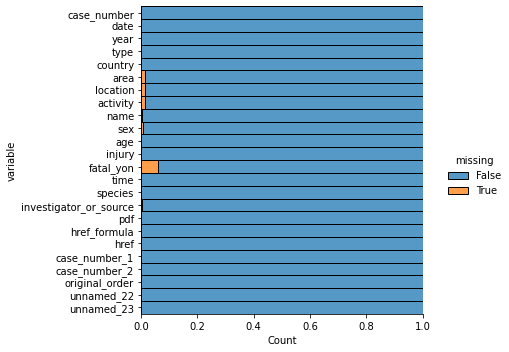

In [665]:
sns.displot(data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25)

plt.show()

No missing values left in species

-------------------------

##### Exploración columna `area`

In [685]:
df.shape

(1573, 24)

In [693]:
index_area=df[df['area'].isna()].index
index_area


Int64Index([  33,   48,  129,  229,  856, 1195, 1365, 2441, 2444, 2581, 2632,
            2937, 3527, 3579, 3661, 3806, 3884, 3960, 4008, 4140, 4441],
           dtype='int64')

In [694]:
df.loc[index_area]

,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_yon,time,species,investigator_or_source,pdf,href_formula,href,case_number_1,case_number_2,original_order,unnamed_22,unnamed_23
33,2018.04.05,05-Apr-2018,2018.0,Unprovoked,BAHAMAS,NaN,Bimini,Swimming,Shane McConnell,M,12,"2 puncture wounds to left foot, abrasion to ri...",N,18h00,Bull shark,"K. McMurray, TrackingSharks.com",2018.04.05-McConnell.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.05,2018.04.05,6270.0,unknown,unknown
48,2018.01.21,21-Jan-2018,2018.0,Unprovoked,NEW CALEDONIA,NaN,Nouville,Spearfishing,male,M,40s,Injuries to abdomen and arm,N,15h30,Bull shark,TrackingSharks.com,2018.01.21-NewCaledonia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.01.21,2018.01.21,6255.0,unknown,unknown
129,2017.06.18.a,18-Jun-2017,2017.0,Unprovoked,REUNION,NaN,Roches Noire,Body boarding,Julien,M,34,"No injury, shark bit surfboard",N,10h00,Bull shark,"Clincanoo, 6/19/2017",2017.06.18.a-Reunion.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.18.a,2017.06.18.a,6174.0,unknown,unknown
229,2016.08.27,27-Aug-2016,2016.0,Unprovoked,REUNION,NaN,Boucan Canot,Surfing,Laurent Chardard,M,20,"Right arm severed, ankle severely bitten",N,17h00,Bull shark,"LaDepeche, 8/29/2016",2016.08.27-Chardard.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.08.27,2016.08.27,6074.0,unknown,unknown
856,2011.10.05,05-Oct-2011,2011.0,Boating,REUNION,NaN,Cap La Houssaye,Canoeing,Jean-Pierre Castellani,M,51,No injury to occupant,N,10h30,Unknown,"Clicanoo, 10/5/2011",2011.10.05-Castellani.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2011.10.05,2011.10.05,5447.0,unknown,unknown
1195,2008.10.21,21-Oct-2008,2008.0,Unprovoked,NEW CALEDONIA,NaN,NaN,Spearfishing,Nicolas Wright,M,24,Legs bitten,N,11h00,Lemon shark,"C. Johansson, GSAF",2008.10.21-Wright.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2008.10.21,2008.10.21,5108.0,unknown,unknown
1365,2007.07.04,04-Jul-2007,2007.0,Unprovoked,REUNION,NaN,Boucan Canot,Body boarding,Vincent Bouju,M,17,Minor injuries to thigh & knee,N,14h30,Unknown,"clicanoo.com, 7/5/2007",2007.07.04-Bouju.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2007.07.04,2007.07.04,4938.0,unknown,unknown
2441,1994.04.06,06-Apr-1994,1994.0,Unprovoked,BAHAMAS,NaN,Rum Cay,Wading,Scott Curatolo-Wagemann,M,20?,Lower right leg bitten,N,10h30,Unknown,S. Curatolo-Wagemann; SharkSurvivors.com,1994.04.06-Wagemann.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1994.04.06,1994.04.06,3862.0,unknown,unknown
2444,1994.03.23.b,23-Mar-1994,1994.0,Unprovoked,CHILE,NaN,300 miles east of Easter Island,Swimming alongside NOAA research vessel Discov...,Heather Boswell,F,19,Leg severed mid-thigh,N,11h58,White shark,"H. Boswell, M. Levine & E. Ritter, GSAF",1994.03.23.b-Boswell.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1994.03.23.b,1994.03.23.b,3859.0,unknown,unknown
2581,1991.09.19,19-Sep-1991,1991.0,Invalid,BAHAMAS,NaN,Bimini,Spearfishing,Omar Karim Huneidi,M,32,"Initally reported as a shark attack, forensic ...",NaN,17h00,Unknown,"E. Pace, FSAF; Sun Sentinel, 9/22/1991, p.3B",1991.09.19-Huneidi.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1991.09.19,1991.09.19,3722.0,unknown,unknown


The records that are NaN match with location index. So, fill in missing values if indices match

In [695]:
df.area = df.area.fillna(df.location)

In [680]:
index_area = [33,   48,  129,  229,  856, 1195, 1365, 2441, 2444, 2581, 2632,
            2937, 3527, 3579, 3661, 3806, 3884, 3960, 4008, 4140, 4441]

In [696]:
df.loc[index_area]

,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_yon,time,species,investigator_or_source,pdf,href_formula,href,case_number_1,case_number_2,original_order,unnamed_22,unnamed_23
33,2018.04.05,05-Apr-2018,2018.0,Unprovoked,BAHAMAS,Bimini,Bimini,Swimming,Shane McConnell,M,12,"2 puncture wounds to left foot, abrasion to ri...",N,18h00,Bull shark,"K. McMurray, TrackingSharks.com",2018.04.05-McConnell.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.05,2018.04.05,6270.0,unknown,unknown
48,2018.01.21,21-Jan-2018,2018.0,Unprovoked,NEW CALEDONIA,Nouville,Nouville,Spearfishing,male,M,40s,Injuries to abdomen and arm,N,15h30,Bull shark,TrackingSharks.com,2018.01.21-NewCaledonia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.01.21,2018.01.21,6255.0,unknown,unknown
129,2017.06.18.a,18-Jun-2017,2017.0,Unprovoked,REUNION,Roches Noire,Roches Noire,Body boarding,Julien,M,34,"No injury, shark bit surfboard",N,10h00,Bull shark,"Clincanoo, 6/19/2017",2017.06.18.a-Reunion.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.18.a,2017.06.18.a,6174.0,unknown,unknown
229,2016.08.27,27-Aug-2016,2016.0,Unprovoked,REUNION,Boucan Canot,Boucan Canot,Surfing,Laurent Chardard,M,20,"Right arm severed, ankle severely bitten",N,17h00,Bull shark,"LaDepeche, 8/29/2016",2016.08.27-Chardard.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.08.27,2016.08.27,6074.0,unknown,unknown
856,2011.10.05,05-Oct-2011,2011.0,Boating,REUNION,Cap La Houssaye,Cap La Houssaye,Canoeing,Jean-Pierre Castellani,M,51,No injury to occupant,N,10h30,Unknown,"Clicanoo, 10/5/2011",2011.10.05-Castellani.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2011.10.05,2011.10.05,5447.0,unknown,unknown
1195,2008.10.21,21-Oct-2008,2008.0,Unprovoked,NEW CALEDONIA,NaN,NaN,Spearfishing,Nicolas Wright,M,24,Legs bitten,N,11h00,Lemon shark,"C. Johansson, GSAF",2008.10.21-Wright.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2008.10.21,2008.10.21,5108.0,unknown,unknown
1365,2007.07.04,04-Jul-2007,2007.0,Unprovoked,REUNION,Boucan Canot,Boucan Canot,Body boarding,Vincent Bouju,M,17,Minor injuries to thigh & knee,N,14h30,Unknown,"clicanoo.com, 7/5/2007",2007.07.04-Bouju.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2007.07.04,2007.07.04,4938.0,unknown,unknown
2441,1994.04.06,06-Apr-1994,1994.0,Unprovoked,BAHAMAS,Rum Cay,Rum Cay,Wading,Scott Curatolo-Wagemann,M,20?,Lower right leg bitten,N,10h30,Unknown,S. Curatolo-Wagemann; SharkSurvivors.com,1994.04.06-Wagemann.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1994.04.06,1994.04.06,3862.0,unknown,unknown
2444,1994.03.23.b,23-Mar-1994,1994.0,Unprovoked,CHILE,300 miles east of Easter Island,300 miles east of Easter Island,Swimming alongside NOAA research vessel Discov...,Heather Boswell,F,19,Leg severed mid-thigh,N,11h58,White shark,"H. Boswell, M. Levine & E. Ritter, GSAF",1994.03.23.b-Boswell.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1994.03.23.b,1994.03.23.b,3859.0,unknown,unknown
2581,1991.09.19,19-Sep-1991,1991.0,Invalid,BAHAMAS,Bimini,Bimini,Spearfishing,Omar Karim Huneidi,M,32,"Initally reported as a shark attack, forensic ...",NaN,17h00,Unknown,"E. Pace, FSAF; Sun Sentinel, 9/22/1991, p.3B",1991.09.19-Huneidi.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1991.09.19,1991.09.19,3722.0,unknown,unknown


In [698]:
df['country']=df['country'].replace('Sierra Leone','SIERRA LEONE')
df['country']=df['country'].replace('ST. MAARTIN','ST. MARTIN')
df['country']=df['country'].replace('Fiji','FIJI')
df['country']=df['country'].replace(' TONGA','TONGA')
df['country']=df['country'].replace('SOUTH CHINA SEA','CINHA')

---------------------------

##### Exploración columna `year`

In [734]:
lista = []
for i,row in df.iterrows():
    lista.append((i, row['year']))

In [739]:
df.year.unique()

array([2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008,
       2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997,
       1996, 1995, 1994, 1993, 1992, 1991, 1990, 1989, 1988, 1987, 1986,
       1985, 1984, 1983, 1982, 1981, 1980, 1979, 1978, 1977, 1976, 1975,
       1974, 1973, 1972, 1971, 1970, 1969, 1968, 1967, 1966, 1965, 1964,
       1963, 1962, 1961, 1960, 1959, 1958, 1957, 1956, 1955, 1954, 1953,
       1952, 1951, 1950, 1949, 1948, 1947, 1946, 1945, 1944, 1943, 1942,
       1941, 1940, 1939, 1938, 1937, 1936, 1935, 1934, 1932, 1931, 1930,
       1929, 1928, 1927, 1926, 1925, 1924, 1922, 1919, 1916, 1912, 1906,
       1905, 1901, 1894, 1892, 1880, 1868,    0])

In [745]:
df['year'] = df['year'].astype('int')

In [749]:
df.year.value_counts().sort_index()

0        4
1868     1
1880     1
1892     1
1894     1
        ..
2014    38
2015    71
2016    39
2017    32
2018    20
Name: year, Length: 106, dtype: int64

------------------

##### Exploración columna `sex`

In [705]:
df.sex.value_counts()

M      1352
F       212
lli       1
Name: sex, dtype: int64

In [709]:
index_sex=df[df['sex']=='lli'].index
index_sex

Int64Index([1624], dtype='int64')

In [710]:
df.drop(index=index_sex,inplace=True)

In [711]:
df.sex.value_counts()

M    1352
F     212
Name: sex, dtype: int64

##### Exploración columna `fatal_yon`

In [714]:
df.fatal_yon.value_counts()

N       1234
Y        238
 N         2
M          1
2017       1
Name: fatal_yon, dtype: int64

In [726]:
df['fatal_yon']=df['fatal_yon'].replace(' N','NO')
df['fatal_yon']=df['fatal_yon'].replace('N','NO')
df['fatal_yon']=df['fatal_yon'].replace('Y','YES')

In [722]:
index_fn=df[df['fatal_yon']=='M'].index
df.drop(index=index_fn,inplace=True)

In [724]:
index_fn= df[df['fatal_yon']=='2017'].index
df.drop(index=index_fn,inplace=True)

In [727]:
df.fatal_yon.value_counts()

NO     1236
YES     238
Name: fatal_yon, dtype: int64

---------------------------------

##### Exploración columna `time`

In [ ]:
time	

# INSIGHTS

## Sex comparison 

The difference in attacks between the two sexes is notorious. It may be because men are less cautious. 

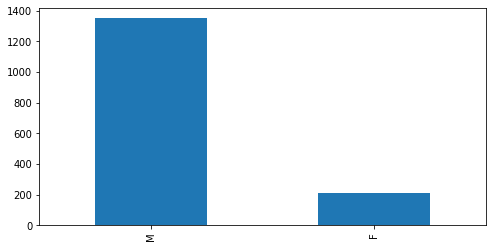

In [713]:
plt.figure(figsize=(8, 4))

df.sex.value_counts().plot.bar();
plt.figure(figsize=(8, 4))
​
df.sex.value_counts().plot.bar();

Injury comparison
Of the attacks observed, the vast majority have been non-fatal.

Injury comparison
df['fatal_yon'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Total Injuries", labelpad=14)
plt.ylabel("Fatal injury", labelpad=14)
plt.title("Injury comparison", y=1.02);


## Year comparison 

Most of the attacks were upper to 1900s. This could be related with the improvement of gathering information

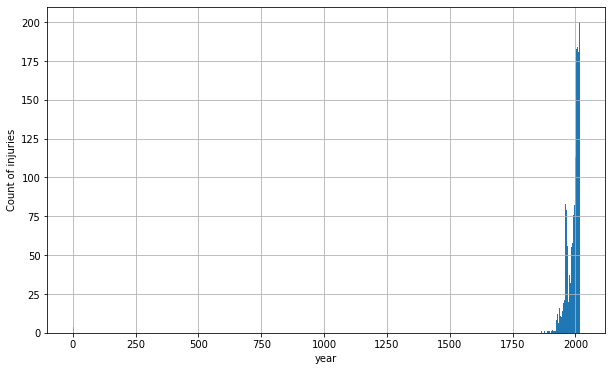

In [764]:
plt.figure(figsize=(10, 6))


df.year.hist(bins=500)

plt.ylabel('Count of injuries')
plt.xlabel('year');

Text(0.5, 1.0, 'Injuries per year since 1960s')

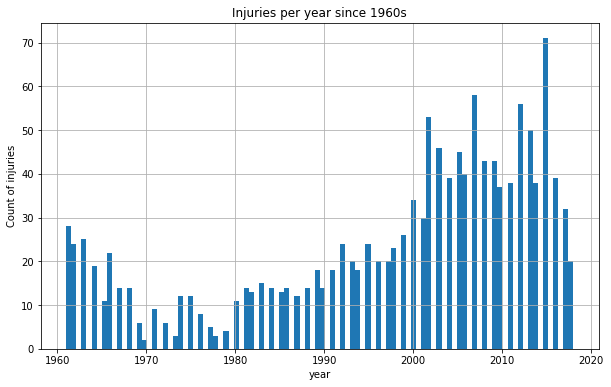

In [769]:
plt.figure(figsize=(10, 6))
data = df[df.year > 1960].year

data.hist(bins=100)

plt.ylabel('Count of injuries')
plt.xlabel('year');
plt.title('Injuries per year since 1960s')